# Logistic Regression

## Binary classification problem

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import process_time
%matplotlib inline

### 1. Visualizing the data

In [59]:
data = pd.read_csv("ex2data1.txt", header=None, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 score')

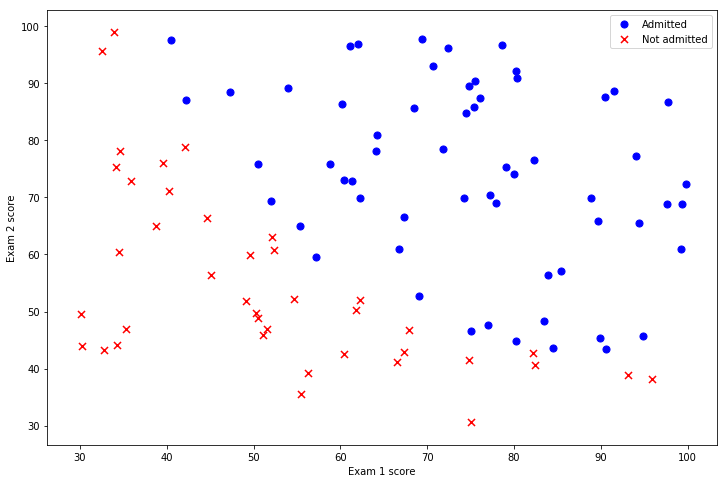

In [60]:
positive = data[data.admitted == 1]
negative = data[data.admitted == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive.exam1, positive.exam2, s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative.exam1, negative.exam2, s=50, c='r', marker='x', label='Not admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [61]:
data.insert(0, 'x0', 1)
data.head()

,x0,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [62]:
col = data.shape[1]
data_x = data.iloc[:, :col - 1].values
data_y = data.iloc[:, col - 1:].values.ravel()
theta = np.zeros(data_x.shape[1])
print(data_x.shape)
print(data_y.shape)
print(theta.shape)

(100, 3)
(100,)
(3,)


### 2. Implementation

#### 2.1 Sigmoid function

The logistic regression hypothesis is defined as $$h_\theta(x)=g(\theta^Tx)$$where function g is the sigmoid function, and it is defined as$$g(z)=\frac{1}{1 + e^{-x}}$$

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

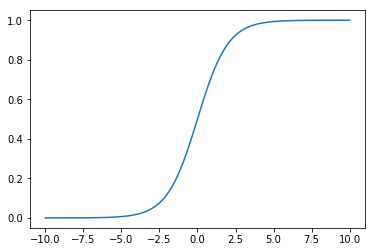

In [64]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))

#### 2.2 Cost function

The cost function in logistic regression is$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}log \left( h_\theta(x^{(i)}) \right) + (1 - y^{(i)})log \left( 1-h_\theta(x^{(i)}) \right) \right]$$

In [65]:
def cost(theta, x, y):
    return np.mean(-y * np.log(sigmoid(x @ theta)) - (1 - y) * np.log(1 - sigmoid(x @ theta)))

In [66]:
cost(theta, data_x, data_y)

0.6931471805599453

#### 2.3 Gradient

And the gradient of the cost is defined as follow$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$Each iteration performs the update until convergence$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum^m_{i=1}\left[h_{\theta}(x^{(i)})-y^{(i)}\right]x_j^{(i)}$$

In [67]:
def gradient(theta, x, y):
    return (1 / len(x)) * x.T @ (sigmoid(x @ theta) - y)

In [82]:
def logistic_regression(theta, x, y, alpha, iters):
    costs = []
    st = process_time()
    
    for i in range(iters):
        theta = theta - alpha * gradient(theta, x, y)
        this_cost = cost(theta, x, y)
        costs.append(this_cost)
    
        if i % 50000 == 0 and i != 0:
            print("Index: {:>7d}, cost: {:>.6f}".format(i, this_cost))
        
    ed = process_time()
    print("\n----Train finish----")
    print("Time cost:{:>.3f}".format(ed - st))
    print("Final cost:{:>.3f}".format(cost(theta, data_x, data_y)))
    print("theta: {}".format(theta))
    
    return theta, costs

In [83]:
theta, costs = logistic_regression(theta, data_x, data_y, 0.001, 1000000)

Index:   50000, cost: 0.208980
Index:  100000, cost: 0.208738
Index:  150000, cost: 0.208509
Index:  200000, cost: 0.208293
Index:  250000, cost: 0.208087
Index:  300000, cost: 0.207892
Index:  350000, cost: 0.207706
Index:  400000, cost: 0.207530
Index:  450000, cost: 0.207362
Index:  500000, cost: 0.207203
Index:  550000, cost: 0.207051
Index:  600000, cost: 0.206906
Index:  650000, cost: 0.206769
Index:  700000, cost: 0.206637
Index:  750000, cost: 0.206512
Index:  800000, cost: 0.206393
Index:  850000, cost: 0.206279
Index:  900000, cost: 0.206170
Index:  950000, cost: 0.206066

----Train finish----
Time cost:42.047
Final cost:0.206
theta: [-21.35938963   0.17584153   0.17069753]


#### 2.4 Evaluating

Decision boundry is defined in this case as$$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$$the line on the coordinate plane is $$x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2}x_1$$

Text(0, 0.5, 'Exam 2 score')

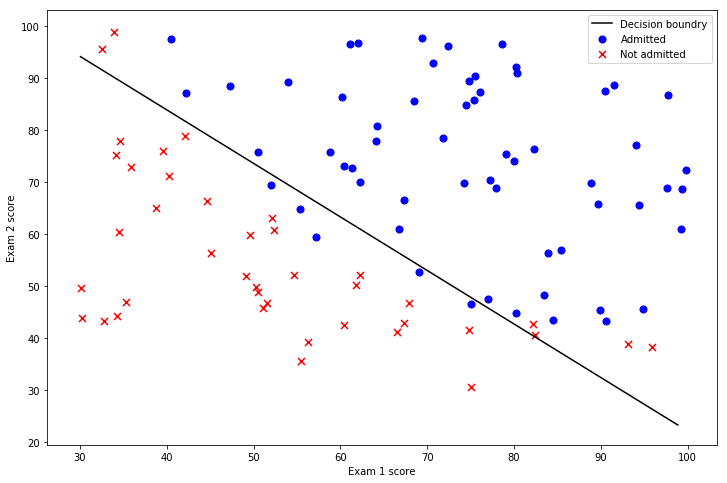

In [84]:
parm = [-theta[0] / theta[2], -theta[1] / theta[2]]
x = np.linspace(data.exam1.min(), data.exam2.max(), 100)
y = np.dot(np.insert(x.reshape(100, 1), 0, np.ones(100), axis=1), parm)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive.exam1, positive.exam2, s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative.exam1, negative.exam2, s=50, c='r', marker='x', label='Not admitted')
ax.plot(x, y, c='k', label='Decision boundry')
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")

Text(0, 0.5, 'Cost')

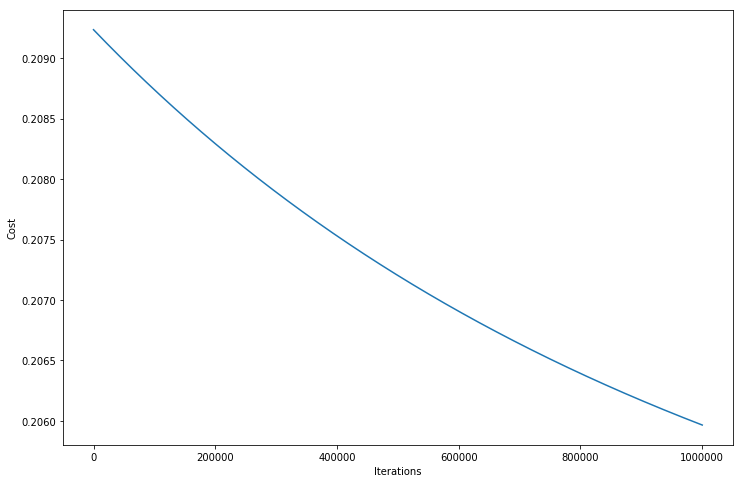

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(costs)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")